In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import json
from folium.plugins import FloatImage


In [60]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../Dataset.csv')

# Display the DataFrame
print(df.head())
df.shape

                                 address                       bank atm_id  \
0       Rua Tomas Da Fonseca TR a Lisbon             BANCO BPI S.A.  BPI17   
1            Estrada De Telheiras Lisbon  BANCO COMERCIAL PORTUGUES   CP01   
2         Rua Abranches Ferrao 8C Lisbon  BANCO COMERCIAL PORTUGUES   CP52   
3  Avenida Dom Vasco Da Gama 50 a Lisbon      BANCO SANTANDER TOTTA   ST98   
4       Rua Abranches Ferrao 17-B Lisbon              BARCLAYS BANK   BB07   

   coord_x   coord_y freguesia  parish   mway_dist   police_dis  income  ...  \
0 -9.17093  38.75610    Lumiar      12  195.353440   898.569719      52  ...   
1 -9.15911  38.76020    Lumiar      12  190.831787   568.679321      56  ...   
2 -9.17203  38.75064   Carnide      10  766.671635  1432.302696      52  ...   
3 -9.22544  38.69942     Belém       6  192.282794  1143.736479      36  ...   
4 -9.17070  38.75117    Lumiar      12  719.798770  1371.942724      58  ...   

   unp_rate  com_dens  freq_attack  success_attack

(723, 22)

In [61]:
# Display the DataFrame structure
print("DataFrame structure:")
print(df.info())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check the data types of columns
print("\nData types of columns:")
df.dtypes

DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   address         723 non-null    object 
 1   bank            723 non-null    object 
 2   atm_id          723 non-null    object 
 3   coord_x         723 non-null    float64
 4   coord_y         723 non-null    float64
 5   freguesia       723 non-null    object 
 6   parish          723 non-null    int64  
 7   mway_dist       723 non-null    float64
 8   police_dis      723 non-null    float64
 9   income          723 non-null    int64  
 10  density         723 non-null    float64
 11  age             723 non-null    int64  
 12  unp_rate        723 non-null    int64  
 13  com_dens        723 non-null    int64  
 14  freq_attack     723 non-null    int64  
 15  success_attack  723 non-null    int64  
 16  n_income        723 non-null    int64  
 17  n_density     

address            object
bank               object
atm_id             object
coord_x           float64
coord_y           float64
freguesia          object
parish              int64
mway_dist         float64
police_dis        float64
income              int64
density           float64
age                 int64
unp_rate            int64
com_dens            int64
freq_attack         int64
success_attack      int64
n_income            int64
n_density           int64
n_age               int64
n_unp_rate          int64
n_com_dens          int64
n_freq_attack       int64
dtype: object

In [62]:
# Count unique values in the "atm_id" column
unique_atm_ids = df['atm_id'].nunique()

# Print the number of unique values
print("Number of unique values in the 'atm_id' column:", unique_atm_ids)


Number of unique values in the 'atm_id' column: 723


In [63]:
# Number of times atms attacked
attacked_atms = df['freq_attack'].sum()
print( attacked_atms)

105


In [64]:
successfull_attacked_atms = df['success_attack'].sum()
print( successfull_attacked_atms)

70


In [65]:
attack_counts = df.groupby('freguesia')['freq_attack'].sum()

# Print the count of attacks in each 'freguesia'
print("Count of attacks in each 'freguesia':")
print(attack_counts)

Count of attacks in each 'freguesia':
freguesia
Alcântara             0
Alvalade              1
Areeiro               0
Arroios               0
Avenidas Novas       19
Belém                 6
Benfica               6
Campo de Ourique      0
Campolide             7
Carnide              32
Estrela               0
Lumiar               29
Marvila               0
MisericOrdia          0
Olivais               5
Parque das Na         0
Penha de Franea       0
Santa Maria Maior     0
Santo Antonio         0
Suo Vicente           0
Name: freq_attack, dtype: int64


In [66]:
# Count unique values in the "freguesia" column
unique_freguesias = df['freguesia'].nunique()

# Print the number of unique values
print("Number of unique values in the 'freguesia' column:", unique_freguesias)


Number of unique values in the 'freguesia' column: 20


In [67]:
attack_counts = df.groupby('freguesia')['success_attack']

# Print the count of attacks in each 'freguesia'
print("Count of attacks in each 'freguesia':")
print(attack_counts)


Count of attacks in each 'freguesia':


In [68]:
df0=df[['density','freq_attack']].groupby('density').sum().reset_index()
df0.head()

,density,freq_attack
0,0.0000,8
1,0.0039,5
2,0.0204,0
3,0.0207,0
4,0.0271,0


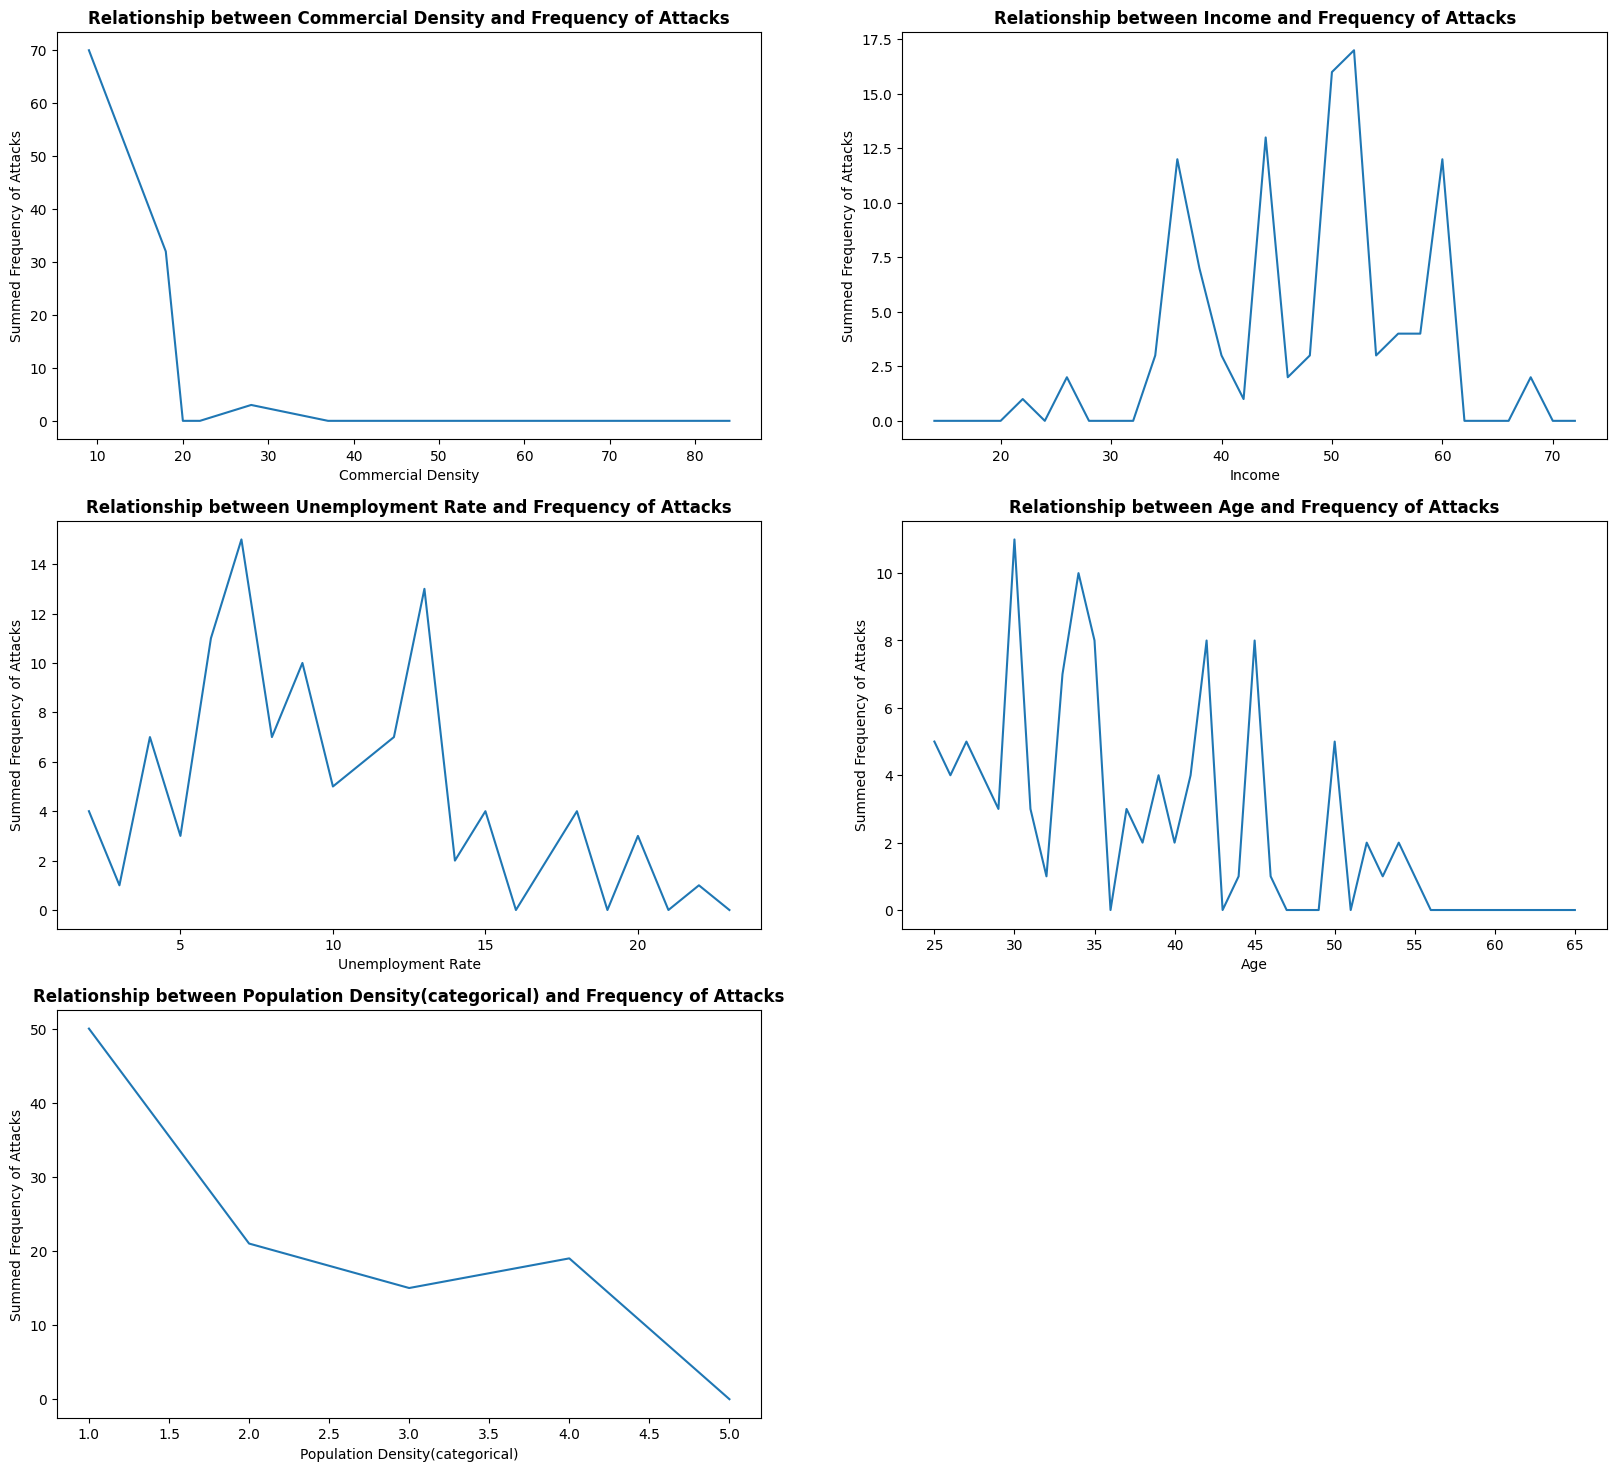

In [76]:


# Assuming df is your DataFrame with the specified columns
# df = df[['com_dens', 'income', 'unp_rate', 'age', 'freq_attack']]
f1=['Commercial Density','Income','Unemployment Rate','Age','Population Density(categorical)']

# Summing up the frequency of attacks
sum_freq_attack = df['freq_attack'].sum()

# Create an array with random noise for the x-values
x_values = np.random.normal(sum_freq_attack, 0.1, size=len(df))

# Plotting
fig=plt.figure(figsize=(20,18))
i=0
j=1
for col in ['com_dens', 'income', 'unp_rate', 'age','n_density']:
    axi=fig.add_subplot(3,2,j)
    df0=df[[col,'freq_attack']].groupby(col).sum().reset_index()
    df0.plot(kind='line',y='freq_attack', x=col,ax=axi)
    # Customize the plot
    plt.ylabel('Summed Frequency of Attacks')
    plt.xlabel(f1[i])
    plt.legend([],frameon=False)
    #axi.set_xticks(np.arange(0,max[df[col],10]))
    plt.title('Relationship between '+f1[i]+' and Frequency of Attacks',fontweight='bold')
    #ax.legend()
    #plt.grid(True)
    i=i+1
    j=j+1

array([[<Axes: title={'center': 'com_dens'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'unp_rate'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'freq_attack'}>, <Axes: >]], dtype=object)

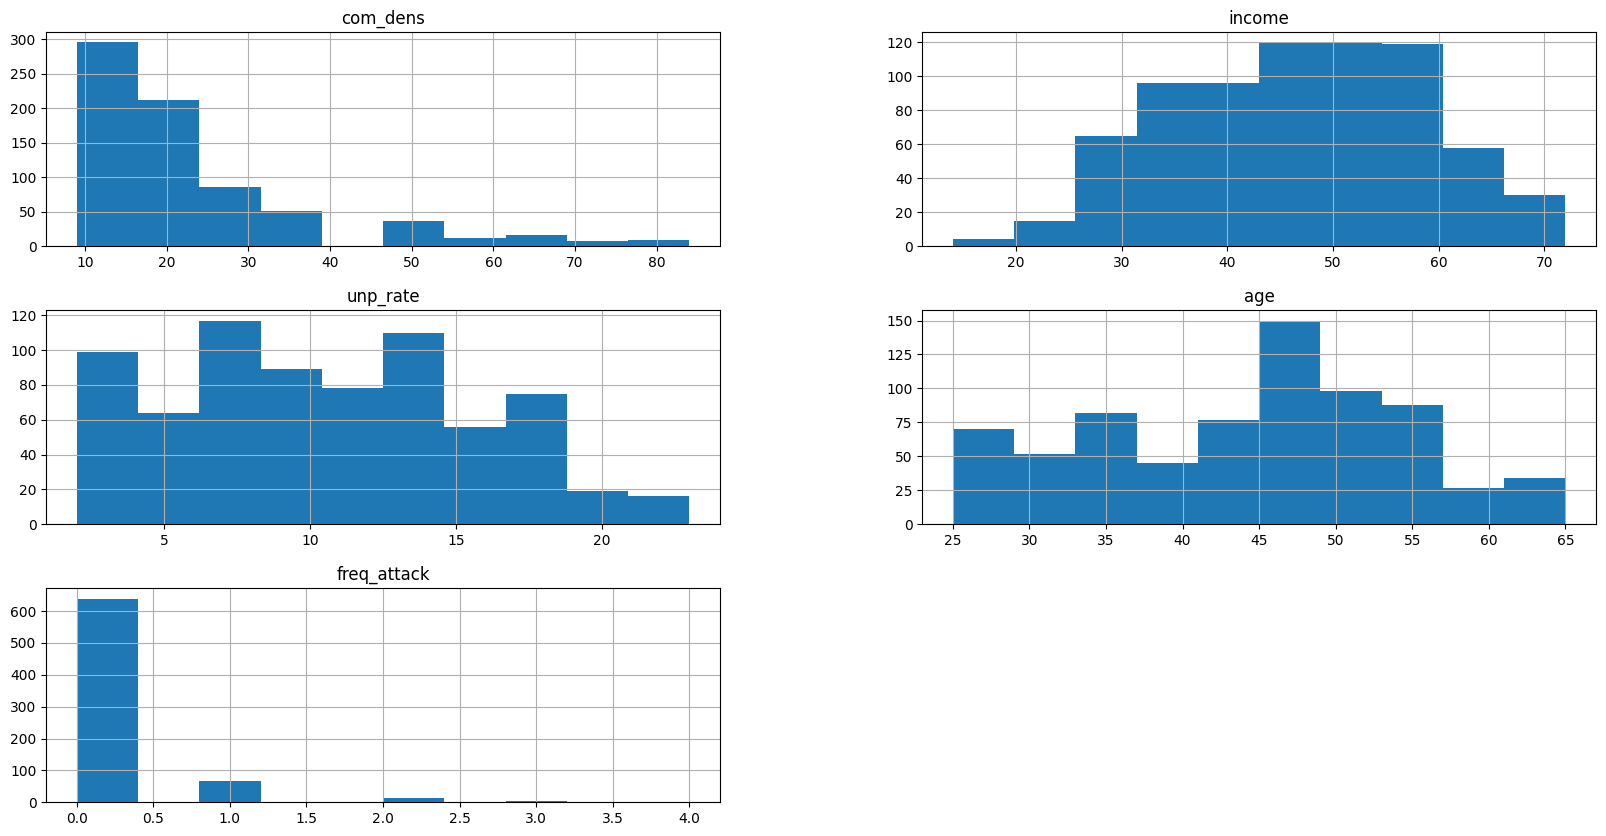

In [70]:
dfx=df[['com_dens', 'income', 'unp_rate', 'age', 'freq_attack']]
dfx.hist(figsize=(20,10))

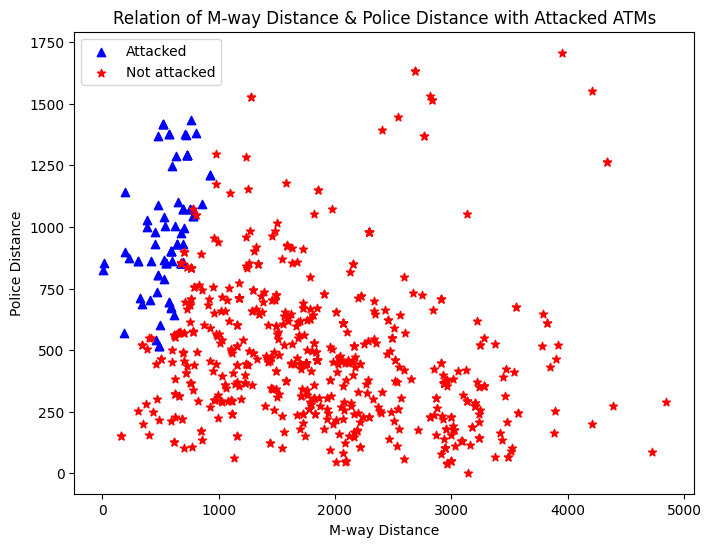

In [71]:


# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot data points where n_freq_attack is 1 (triangle)
plt.scatter(df.loc[df['n_freq_attack'] == 1, 'mway_dist'], 
            df.loc[df['n_freq_attack'] == 1, 'police_dis'], 
            color='blue', marker='^', label='Attacked')

# Plot data points where n_freq_attack is 0 (circle)
plt.scatter(df.loc[df['n_freq_attack'] == 0, 'mway_dist'], 
            df.loc[df['n_freq_attack'] == 0, 'police_dis'], 
            color='red', marker='*', label='Not attacked')

# Add labels and title
plt.xlabel('M-way Distance')
plt.ylabel('Police Distance')
plt.title('Relation of M-way Distance & Police Distance with Attacked ATMs')
plt.legend()

# Show plot

plt.show()


            freguesia  atm_id  freq_attack
0           Alcântara      22            0
1            Alvalade      41            1
2             Areeiro       8            0
3             Arroios      66            0
4      Avenidas Novas     124           19
5               Belém      23            6
6             Benfica      21            6
7    Campo de Ourique      32            0
8           Campolide      30            7
9             Carnide      53           32
10            Estrela      11            0
11             Lumiar      58           29
12            Marvila      27            0
13       MisericOrdia      15            0
14            Olivais      29            5
15      Parque das Na      46            0
16    Penha de Franea       7            0
17  Santa Maria Maior      59            0
18      Santo Antonio      45            0
19        Suo Vicente       6            0


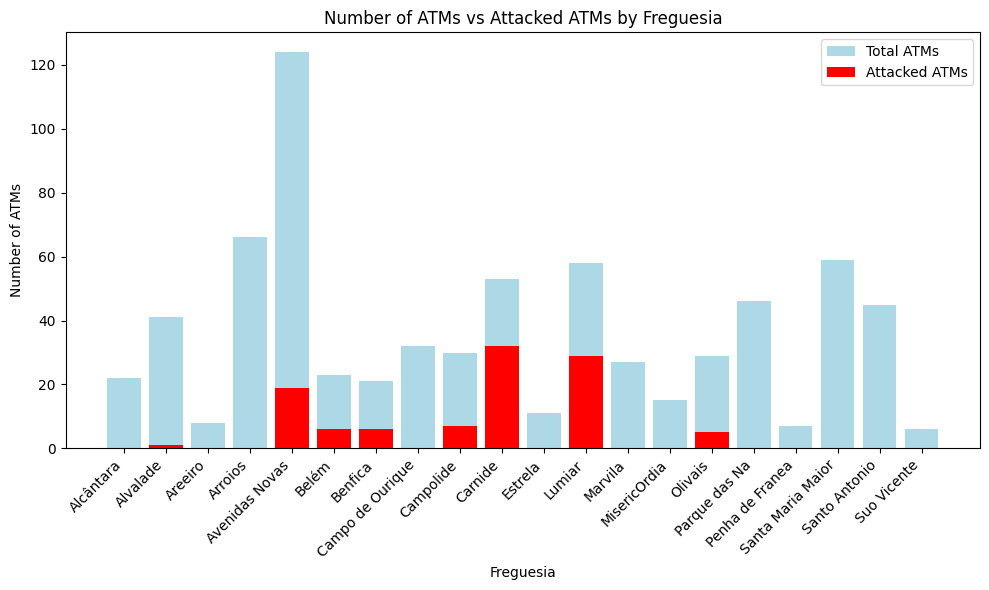

In [72]:
# Grouping by 'freguesia' and aggregating to get the total number of ATMs and the number of attacked ATMs
grouped_df = df.groupby('freguesia').agg({'atm_id': 'count', 'freq_attack': 'sum'}).reset_index()
print(grouped_df)
# Sort the DataFrame by 'freguesia'
grouped_df = grouped_df.sort_values(by='freguesia')

# Creating the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['freguesia'], grouped_df['atm_id'], color='lightblue', label='Total ATMs')
bars2 = plt.bar(grouped_df['freguesia'], grouped_df['freq_attack'], color='red', label='Attacked ATMs')
plt.xlabel('Freguesia')
plt.ylabel('Number of ATMs')
plt.title('Number of ATMs vs Attacked ATMs by Freguesia')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels
plt.tight_layout()
plt.show()

In [73]:

# Define grid resolution (in degrees)
resolution = 0.01

# Define latitude and longitude boundaries for your area of interest
min_lat, max_lat = min(df['coord_y']), max(df['coord_y'])
min_lon, max_lon = min(df['coord_x']), max(df['coord_x'])

print("Minimum Latitude:", min_lat)
print("Maximum Latitude:", max_lat)
print("Minimum Longitude:", min_lon)
print("Maximum Longitude:", max_lon)

# Generate grid cells
latitudes = np.arange(min_lat, max_lat, resolution)
longitudes = np.arange(min_lon, max_lon, resolution)

# Create a dictionary to store grid cell boundaries and IDs
grid = {}
grid_id = 0

# Assign IDs to grid cells and store their boundaries
for lat_start, lat_end in zip(latitudes[:-1], latitudes[1:]):
    for lon_start, lon_end in zip(longitudes[:-1], longitudes[1:]):
        grid[(lat_start, lon_start)] = {
            'id': grid_id,
            'lat_start': lat_start,
            'lat_end': lat_end,
            'lon_start': lon_start,
            'lon_end': lon_end
        }
        grid_id += 1

# Print the number of grid cells created
print("Number of grid cells:", len(grid))
# Calculate the size of each grid cell




Minimum Latitude: 38.69599
Maximum Latitude: 38.79159
Minimum Longitude: -9.22544
Maximum Longitude: -9.09196
Number of grid cells: 117


In [74]:


# Load the GeoJSON file containing the outline of Lisbon
with open('lisbon.geojson') as f:
    lisbon_geojson = json.load(f)

# Define the minimum and maximum latitude and longitude
min_lat = 38.69599
max_lat = 38.79159
min_lon = -9.22544
max_lon = -9.09196

# Create a folium map centered around the average coordinates of your data
map_center = [(min_lat + max_lat) / 2, (min_lon + max_lon) / 2]
m = folium.Map(location=map_center, zoom_start=10, tiles='cartodbpositron')

# Add the GeoJSON overlay for the outline of Lisbon
folium.GeoJson(
    lisbon_geojson,
    style_function=lambda feature: {
        'color': 'black',  # Outline color
        'weight': 2  # Outline weight
    }
).add_to(m)

# Define the number of grid cells
num_lat_cells = 10
num_lon_cells = 10

# Calculate the size of each grid cell
lat_step = (max_lat - min_lat) / num_lat_cells
lon_step = (max_lon - min_lon) / num_lon_cells

# Generate latitude and longitude values for the grid cells
latitudes = [min_lat + i * lat_step for i in range(num_lat_cells)]
longitudes = [min_lon + i * lon_step for i in range(num_lon_cells)]

# Create legend
legend_html = '''
 <div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 160px; 
            border: 2px solid grey; border-radius: 10px; background-color: rgba(255, 255, 255, 0.9);
            z-index: 9999; font-size: 14px; padding: 10px; text-align: center;">
    <div style="font-weight: bold;">Frequency of Attacks</div>
    <div style="margin-top: 10px;">
        <div style="display: inline-block; width: 20px; height: 20px; background-color: rgba(0, 0, 0, 0.5); border-radius: 50%;"></div>
        <span style="margin-left: 5px;">1-2</span>
    </div>
    <div style="margin-top: 5px;">
        <div style="display: inline-block; width: 20px; height: 20px; background-color: rgba(0, 0, 0, 0.7); border-radius: 50%;"></div>
        <span style="margin-left: 5px;">3-4</span>
    </div>
    <div style="margin-top: 5px;">
        <div style="display: inline-block; width: 20px; height: 20px; background-color: rgba(0, 0, 0, 1.0); border-radius: 50%;"></div>
        <span style="margin-left: 5px;">>4</span>
    </div>
</div>

     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Add grid cells as polygons to the map for cells with non-zero frequency of attacks
for i, lat in enumerate(latitudes):
    for j, lon in enumerate(longitudes):
        # Define the coordinates of the four corners of the grid cell
        coordinates = [
            [lat, lon],
            [lat + lat_step, lon],
            [lat + lat_step, lon + lon_step],
            [lat, lon + lon_step],
            [lat, lon]  # To close the polygon
        ]
        # Calculate the frequency of attacks for this grid cell
        freq_attacks = df[
            (df['coord_y'] >= lat) & (df['coord_y'] < lat + lat_step) &
            (df['coord_x'] >= lon) & (df['coord_x'] < lon + lon_step)
        ]['freq_attack'].sum()

        # If the frequency of attacks is non-zero, add the polygon to the map
        if freq_attacks > 0:
            # Calculate opacity based on frequency of attacks
            opacity = min(0.5 + 0.1 * freq_attacks, 1.0)  # Adjust as needed
            # Create a color gradient from light to dark
            color = f'rgba(0, 0, 0, {opacity})'
            # Add the polygon with the gradient fill
            folium.Polygon(
                locations=coordinates,
                color=color,
                fill_color=color,
                fill_opacity=1.0
            ).add_to(m)



# Display the map
m



In [75]:
import folium
from folium.plugins import HeatMap

# Extracting coordinates and frequency of attacks from the DataFrame
coordinates = df[['coord_y', 'coord_x']].values
freq_attack = df['freq_attack'].values

# Convert frequency values to regular Python integers
freq_attack = freq_attack.astype(int)

# Create a folium map centered around the average coordinates of your data
avg_lat = coordinates[:, 0].mean()
avg_lon = coordinates[:, 1].mean()
map_center = [avg_lat, avg_lon]
m = folium.Map(location=map_center, zoom_start=10)

# Combine the coordinates and frequency of attacks into a list of lists
data = [[coord[0], coord[1], int(freq)] for coord, freq in zip(coordinates, freq_attack)]

# Create a HeatMap layer using the combined data
heatmap_layer = HeatMap(data=data,
                        min_opacity=0.2,
                        radius=25, blur=15)

# Add the HeatMap layer to the map
m.add_child(heatmap_layer)

# Display the map
m
